In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("A4.ipynb")

# Assignment 4

## **Due: Nov 8th (Friday), 2024, 11:59pm (Pacific Time)**

### **Instructions:**

Your Jupyter notebook assignment will often have 3 elements: written answers, code answers, and quiz answers. For written answers, you may insert images of your handwritten work in code cells, or write your answers in markdown and LaTeX. For quiz answers, your `record.txt` file will record your answer choices in the quiz modules for submission. Both your quiz answers and code answers will be autograded on Gradescope. This assignment does not have the quiz portion.

For all elements, DO NOT MODIFY THE CELLS. Put your answers **only** in the answer cells given, and **do not delete cells**. If you fail to follow these instructions, you will lose points on your submission.

Make sure to show the steps of your solution for every question to receive credit, not just the final answer. You may search information online but you will need to write code/find solutions to answer the questions yourself. You will submit your .ipynb file and record.txt to gradescope when you are finished.

### **Late Policy:**

5% reduction for the first day and 10% reduction afterwards for every extra day past due.

### How to Include Your Math Written Answer?

You could use markdowns' include image functionality (recommended) or $\LaTeX$ in markdown to submit your written responses.

#### Include Images (recommended)
If you are still getting familiar with using LaTeX, handwrite the response on paper or the stylus. Take a picture or screenshot of your answer, and include that image in the Jupyter Notebook. Be sure to include that image in the `\imgs` directory. Let's say you have your Q1 response saved as `imgs/Q1.png`; the markdown syntax to include that image is `![Q1](imgs/Q1.png)`.

#### $\LaTeX$
[Here is a fantastic tutorial from CalTech about using $\LaTeX$ in Jupyter Notebook.](http://chebe163.caltech.edu/2018w/handouts/intro_to_latex.html). You could also find various $\LaTeX$ tutorials and cheat sheets online.

## Important Notice

You must check both submission output on the gradescope (`Assignment 4 - Notebook` and `Assignment 4 - Manual Grading`) correctly reflects your work and responses. If you notice inconsistencies between your notebook and the Manual Grading portion, you need to make a Piazza post, and we can help you with that.

# Question 1: Conceptual Questions

Select the correct option(s). Note that there might be multiple correct options.

Write your solution as a list of strings by replacing the "..." 

Ex.: `["A"]` if you think the answer is A, and `["A", "C"]` if you think the answers are A and C). 

## 1.1

Choose **all** the valid answers to the description about **linear regression** and **logistic regression** from the options below:

A. Linear regression is an unsupervised learning problem; logistic regression is a supervised learning problem. 

B. Linear regression deals with the prediction of continuous values; logistic regression deals with the prediction of class labels.

C. We cannot use gradient descent to solve linear regression. Instead, we can only use the closed-form solution to tackle the linear regression problem.

D. Linear regression is a convex optimization problem whereas logistic regression is not.

_Points:_ 2

In [2]:
q1_1 = ["B"]

In [3]:
grader.check("Q1_1")

Q1_1 results: All test cases passed!

## 1.2

Choose **all** the valid answers to the description about **gradient descent** from the options below:


A. The global minimum is guaranteed to be reached by using gradient descent.

B. Every gradient descent iteration can always decrease the value of loss function even when the gradient of the loss function is zero.

C. When the learning rate is very large, it is possible that some iterations of gradient descent may not decrease the value of loss function.

D. With different initial weights, it is possible for the gradient descent algorithm to obtain to different local minimum.

_Points:_ 2

In [4]:
q1_2 = ["C", "D"]

In [5]:
grader.check("Q1_2")

Q1_2 results: All test cases passed!

## Question 2 Error Metrics

The grid below shows $5 \times 4 = 20$ possible locations for targets to appear. We make guesses at the locations where targets are located, and mark those cells in blue. For the rest of the locations, we guess that those locations are non-targets, which are marked in white. The actual locations for the target are marked with a circle in cells, while the actual locations for non-target are marked with empty cells.

<img src="imgs/error-metric.png" width="20%" />

### 1. Please evaluate the following metrics for your guesses.

- True Positive (variable name `TP`): The case which is target and predicted as target.
- True Negative (variable name `TN`): The case which is non-target and predicted as non-target.
- False Positive (variable name `FP`): The case which is non-target but predicted as target.
- False Negative (variable name `FN`): The case which is target but predicted as non-target.

Write your solution as a number by replacing the `...` part after each variable.

Hint: In this question, all the numbers should be integers. Ex.: `TP=1`.

_Points:_ 4

In [6]:
TP = 2
TN = 15
FP = 2
FN = 1

In [7]:
grader.check("Q2_1")

Q2_1 results: All test cases passed!

### 2. Please evaluate the following metrics.

You may use the results from the previous question.

- Precision (variable name `precision`): 
$$\text{Precision}=\frac{\text{number of true positives}}{\text{number of guesses}}$$
- Recall (variable name `recall`): 
$$\text{Recall}=\frac{\text{number of true positives}}{\text{number of actual targets}}$$
- F-value (variable name `f_value`): 
$$\text{F-value}=\frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$

Write your solution as a number by replacing the `...` part after each variable. Please round your answers to **2 decimal places**.

Hint: In this question, all the numbers should be floats. Ex.: `precision=0.60`.

_Points:_ 6

In [12]:
precision = 0.50
recall = 0.67
f_value = 0.57

In [13]:
grader.check("Q2_2")

Q2_2 results: All test cases passed!

# Question 3: Linear Regression

Assume we are given a dataset $S = {(x_i, y_i) | i \in {1, . . . , n}}$. Here, $x_i \in \mathbb{R}$ is a feature scalar (a.k.a. value of input variable) and $y_i \in \mathbb{R}$ is its corresponding value (a.k.a. value of dependent variable). In this section, we aim to fit data points with a line:

$$ y = w_0 + w_1x $$

where $w_0$, $w_1 \in \mathbb{R}$ are two parameters to determine the line. Next, we measure the quality of fitting by evaluating a sum-of-squares error function $g(w_0, w_1)$ :

$$ g(w_0, w_1) = \sum_{i=1}^{n} (w_0 + w_1 x_i - y_i)^2 $$

When $g(w_0, w_1)$ is near zero, it means the proposed line can fit the dataset and model and model an accurate relation between $x_i$ and $y_i$. The best linewith parameters $(w^∗_0, w^∗_1)$ can reach the minimum value of the error function $g(w_0, w_1)$:

$$(w^∗_0, w^∗_1) = \underset{w_0, w_1}{\operatorname{argmin}} \, g(w_0, w_1)$$

To obtain the parameters of the best line, we will take the gradient of function $g(w_0, w_1)$ and set it to zero. That is:

$$\nabla g(w_0, w_1) = 0$$

The solution $(w^*_0, w^*_1)$ of the above equation will determine the best line $y=w^∗_0 + w^∗_1 x$ that fits the dataset $S$.
In reality, we typically tackle this task in a matrix form: First, we represent data points as matrices $X = [x_1, x_2, . . . , x_n]^T$ and $Y = [y_1, y_2, . . . , y_n]^\top$, where $x_i = [1, x_i]^\top$ is a feature vector corresponding to $x_i$. The parameters of the line are also represented as a matrix $W = [w_0, w_1]^T$. Thus, the sum-of-squares error
function $g(W)$ can be defined as (a.k.a. squared $L_2$ norm):

$$\begin{aligned}
g(W) &= \sum_{i=1}^{n}(x_i^TW - y_i)^2 \\
 &= || XW − Y ||_2^2 \\
 &= (XW − Y )^\top(XW-Y)
\end{aligned}
$$
Similarly, the parameters $W^∗ = [w^∗_0, w^∗_1]^\top$ of the best line can be obtained by solving the equation below:

$$ \nabla g(W) = \frac{\partial g(W)}{\partial W} = 0 $$

<!-- BEGIN QUESTION -->

## Question 3.1 OLS Matrix Form
According to the definition of $g(W)$ above, compute the gradient of $g(W)$ with respect to $W$. Your result should be in the form of $X$, $Y$, and $W$. 

Show your work.

_Points:_ 6

$$
\begin{aligned}
g(W) &= (XW - Y)^T (XW - Y) \\\\
&= (W^T X^T - Y^T) (XW - Y) \\\\
&= W^T X^T X W - Y^T X W - W^T X^T Y + Y^T Y \\\\
\nabla g(W) &= 2X^T X W - (Y^T X)^T - X^T Y + 0 \\\\
&= 2X^T X W - X^T Y - X^T Y + 0 \\\\
&= 2X^T X W - 2 X^T Y
\end{aligned}
$$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3.2: OLS Matrix Solution

By setting the answer of last part to 0, prove the following:

$$ W^∗ = \underset{W}{\operatorname{argmin}} \, g(W) = (X^TX)^{-1}X^TY$$

Note: The above formula demonstrates a closed form solution of $$\nabla g(W) = \frac{\partial g(W)}{\partial W} = 0$$

Show your work.

_Points:_ 4

$$
\begin{aligned}
\nabla g(W^*) &= 0 \\\\
2X^T X W^* - 2 X^T Y &= 0 \\\\
2X^T X W^* &= 2 X^T Y \\\\
X^T X W^* &= X^T Y \\\\
W^* &= (X^TX)^{-1} X^T Y
\end{aligned}
$$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## (Extra Credit) Question 3.3: L-1 Error

Previously, we define a sum-of-squares error function $g(w_0, w_1) = \sum_{i=1}^{n} (y_i - w_0 - w_1 x_1)^2$ and represent it in a matrix form $g(W) = \left\lVert X W - Y \right\rVert_2^2$. Actually, we can have multiple choices of the error function: For example, we can define a sum-of-absolute error function $h(w_0, w_1)$:
$$
    h(w_0, w_1) = \sum_{i=1}^{n} |w_0 + w_1 x_i - y_i|
$$
and represent it in a matrix form $h(W)$ (a.k.a. $L_1$ norm):

$$
\begin{aligned}
    h(W) & = \sum_{i=1}^{n} |\mathbf{x}_i^T W - y_i| \\
         & = \left\lVert X W - Y \right\rVert_1
\end{aligned}
$$
According to the information above, compute the gradient of the error function $h(W)$ with respect to $W$. Your result should be in the form of $\mathbf{x}_i$, $y_i$ and $W$.

**Hint**: Given a function $f(\mathbf{x}) \in \mathbb{R}$, we have:
$$ \frac{\partial |f(\mathbf{x})|}{\partial \mathbf{x}} = \text{sign}(f(\mathbf{x}))\frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} $$

 where
$$
\text{sign}(x) = \left\{
             \begin{array}{cl}
              1,  & x > 0 \\
              0,  & x = 0 \\
             -1,  & x < 0.
             \end{array}  
        \right. \nonumber
$$


_Points:_ 5

$$
\begin{aligned}
h(W) &= \left\lVert X W - Y \right\rVert_1 \\\\
\nabla h(W) &= \frac{\partial(XW - Y)}{\partial W} \text{sign}(XW - Y)  \\\\
&= X^T \text{sign}(XW - Y) \\\\
\end{aligned}
$$

<!-- END QUESTION -->

## (You DO NOT need to solve this problem) Question 3.4 


In fact, the gradient in Q3.3 can also be represented as:
$$
\begin{aligned}
\nabla h(W) = \frac{\partial h(W)}{\partial W} = \Big(\big(\text{sign}(X W-Y)\big)^{\top} X\Big)^\top
\end{aligned}
$$
where $\text{sign}(A)$ means performing element-wise $\text{sign}(a_{ij})$ over all element $a_{ij}$ in a matrix $A$. This matrix form of gradient can be helpful in some following coding questions.

# Question 4: Parabola Estimation

We are given a dataset $S=\{(x_i,y_i), i=1,\ldots,n\}$. Here, $x_i$ is a feature scalar. In this section, we aim to fit data points with a parabola:
$$
    y = w_0 + w_1 x + w_2 x^2 
$$
where $w_0, w_1, w_2 \in \mathbb{R}$ are three parameters to determine the parabola. Then, we represent the data points as matrices $X=[\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n]^\top$ and $Y=[y_1, y_2, \ldots, y_n]^\top$, where $\mathbf{x}_i=[1, x_i, x_i^2]^\top$ is a feature vector corresponding to the data $x_i$. The parameters of the parabola are also represented as a matrix $W=[w_0, w_1, w_2]^\top$. Next, we define some loss function $\mathcal{L}(W)$ and attempt to obtain the best parameters $W^*$ that minimizes $\mathcal{L}(W)$.

In [14]:
# Importing Important packages (nothing to add to this cell)

import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Loading the data (nothing to add to this cell)

X_and_Y = np.load('./parabola_estimation.npy')
old_X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
old_X.shape

(300,)

## Visualizing the Data

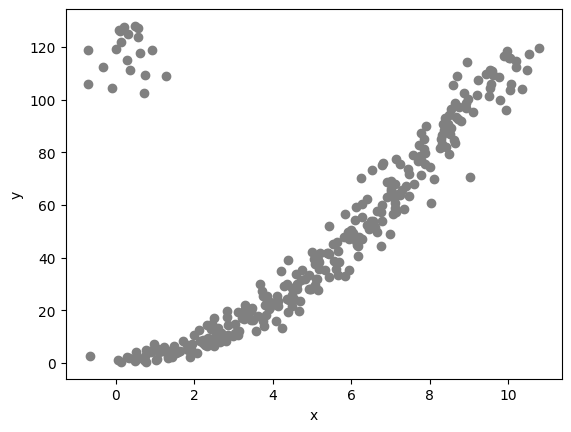

In [16]:
# Visualization of the original datapoints (nothing to add to this cell).

def vis(w0, w1, w2):
    draw_plane = (w0 is not None) and (w1 is not None) and (w2 is not None)
    if draw_plane:
        X_line = np.linspace(0,10,300)
        Y_line = w0 + w1 * X_line + w2 * (X_line**2)
        plt.plot(X_line, Y_line, color='orange')
        
    plt.scatter(old_X, Y, color='gray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
vis(None, None, None)

## Question 4.1: Parabola Estimation with Squared $L_2$ Norm
Consider squared $L_2$ norm as the loss function $\mathcal{L}(W)$:

$$
\begin{aligned}
    \mathcal{L}(W) & = \sum_{i=1}^{n} (\mathbf{x}_i^T W - y_i)^2  \\
    & = \left\lVert X  W - Y \right\rVert_2^2 \\
    & = (X W - Y)^T (X  W - Y).
\end{aligned}
$$

Complete the following code to use the **closed form solution** to compute $W^* = \arg\min_{W} \mathcal{L}(W)$ and plot the scatter graph of data and estimated parabola.

Write your code in the `...` part.

**Hint**: You may refer to Q3.2 for the analytic solution. Also, `np.hstack` may be useful for constructing the design matrix $X$.

_Points:_ 3

y = 51.07 + -16.06*x + 2.36*x^2


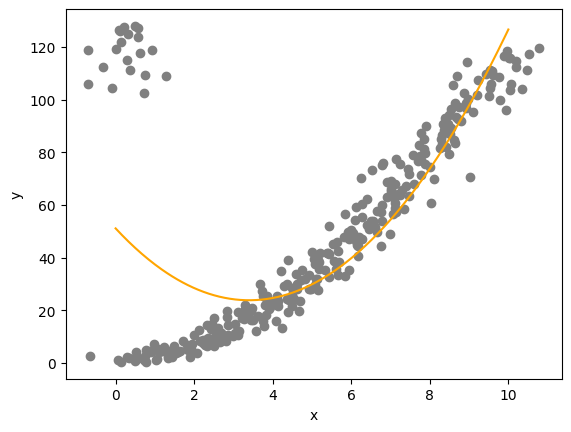

In [29]:
def l2_analytic_estimation(old_X, Y):
    # Construct a design matrix of shape (300,3)
    X = np.vstack([np.ones(old_X.shape[0]), old_X, old_X ** 2]).T

    # Hint: In the form of X and Y and should have a shape of (3,1)
    W = np.linalg.inv(X.T @ X) @ X.T @ Y

    w0, w1, w2 = W
    return X, np.array([w0, w1, w2])

X, W = l2_analytic_estimation(old_X, Y)
w0, w1, w2 = W
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))
vis(w0, w1, w2)

## Question 4.2 Parabola Estimation with $L_1$  Norm

Consider $L_1$ norm as the loss function $\mathcal{L}(W)$:

$$
\begin{aligned}
\mathcal{L}(W) & = \sum_{i=1}^{n} |\mathbf{x}_i^T W - y_i| \\
& = \left\lVert X W - Y \right\rVert_1
\end{aligned}
$$

In this problem, we would like to use the **gradient descent** to calculate the parameters $W$ for the parabola.

If we have a loss function $\mathcal{L}(W)$, then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters W.

for i = 1 to `iterations`:

- **Step 2**. Compute the gradient $\nabla \mathcal{L}(W) = \frac{\partial \mathcal{L}(W)}{\partial W}$.

- **Step 3**. Update the parameters $W \leftarrow \mathcal{L}(W) = W - \eta \frac{\partial \mathcal{L}(W)}{\partial W}$ where $\eta$ is the learning rate.

Please complete the following code to calculate the gradient for the loss function, and perform the gradient descent algorithm. 

Write your code in the `...` part.

**Hint 1**: You may refer to Q3.4 for the gradient of $L_1$ norm. 

**Hint 2**: You may use your previous design matrix of $X$.


_Points:_ 4

In [56]:
# Gradient of L(W) with respect to W 
#(you need to add code to this cell as indicated below).

def grad_L_W_ver1(X, Y, W):
    grad = (np.sign(X @ W - Y).T @ X).T
    assert grad.shape == (3,1)
    return grad

y = 1.64 + 1.15*x + 1.05*x^2


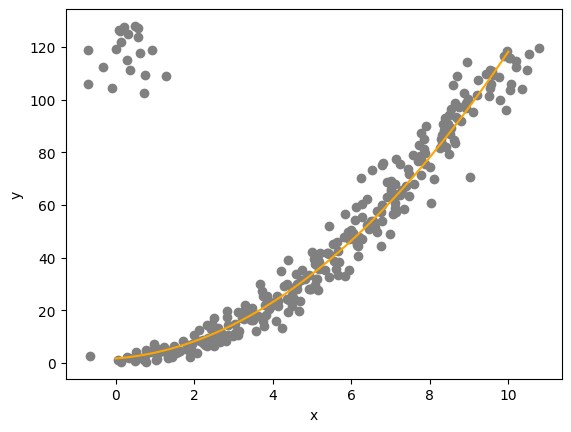

In [58]:
# Estimating W, which defines the hyperplane using gradient descent (you need to add code to this cell as indicated below).
# y = w0 + w1*x + w2*x^2
def l1_grad_descent(X, Y):
    assert X.shape == (300,3), f"Your design matrix is shaped wrong, got {X.shape}"
    
    # Some settings.
    Y = Y.reshape(-1, 1)
    iterations    = 300000
    learning_rate = 0.000001

    # Gradient descent algorithm.
    # Step 1. Initialize the parameters W using np.zeros
    W = np.zeros((3, 1))


    for i in range(iterations):
        # Step 2. Calculate the gradient of L(W) w.r.t. W. 
        grad = grad_L_W_ver1(X, Y, W)
        # Step 3. Update parameters W.
        W -= learning_rate * grad

    # Store the parameters of the parabola.
    w0, w1, w2 = np.array(W).reshape(-1)
    
    return np.array([w0,w1,w2])

# Visualization.
w0, w1, w2 = l1_grad_descent(X, Y)
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))
vis(w0, w1, w2)

## Question 4.3 Parabola Estimation with Squared $L_2$ Norm and $L_1$ Norm

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the parabola.
The loss function $\mathcal{L}(W)$ now contains two parts: A squared $L_2$ norm and a $L_1$ norm.
A coefficient $\alpha$ is used to control the ratio of these two norms:

$$
\begin{aligned}
\mathcal{L}(W) 
& = \sum_{i=1}^{n} 
\Big(\alpha\big(\mathbf{x}_i^T W - y_i\big)^2 + (1-\alpha)|\mathbf{x}_i^T W - y_i| \Big) \\
& = \alpha\left\lVert X W - Y \right\rVert_2^2 + (1-\alpha)\left\lVert X W - Y \right\rVert_1 \\
\nonumber
\end{aligned}
$$

Complete the following code to use the **gradient descent** to find $W^*$ when $\alpha=0, \alpha=0.03, \alpha=0.05, \alpha=0.1$, and $\alpha=1$, espectively.

Write your code in the `...` part.

**Hint**: You may refer to Q3.1 for the gradient of $L_2$ norm. 

**Note:** It may take 2~3 mins to run the algorithm.

_Points:_ 6

In [59]:
# Gradient of L(W) with respect to W (you need to add code to this cell as indicated below).
def grad_L_W_ver2(X, Y, W, alpha):
    grad = (1.0 - alpha) * (np.sign(X @ W - Y).T @ X).T + alpha * 2 * (X.T @ X @ W - X.T @ Y)
    return grad

In [60]:
# Function to use gradient descent to estimate parabola given a list of alphas
# (you need to add code to this cell as indicated below).
# Hint: For each alpha, you need to use gradient descent, hence, you need to write a loop inside the loop.

def l1_l2_grad_descent(old_X, X, Y, alpha_list):
    # Some settings
    Y = Y.reshape(-1, 1)
    iterations    = 300000
    learning_rate = 0.000001
    
    w_history = []
    # Loop over alpha(s).
    for alpha in alpha_list:
        
        # Gradient descent algorithm.
        # Step 1. Initialize the parameters W.
        W = np.zeros((3, 1))
        for i in range(iterations):
            # Step 2. Calculate the gradient of L(W) w.r.t. W.
            grad = grad_L_W_ver2(X, Y, W, alpha)
            # Step 3. Update parameters W.
            W -= learning_rate * grad

        # Get the parameters of the parabola.
        w0, w1, w2 = np.array(W).reshape(-1)
        w_history.append((w0,w1,w2))
        
    return np.array(w_history)

When alpha = 0,
y = 1.64 + 1.15*x + 1.05*x^2
When alpha = 0.03,
y = 20.82 + -5.27*x + 1.53*x^2
When alpha = 0.05,
y = 30.17 + -8.45*x + 1.77*x^2
When alpha = 0.1,
y = 42.31 + -12.78*x + 2.11*x^2
When alpha = 1,
y = 51.07 + -16.06*x + 2.36*x^2


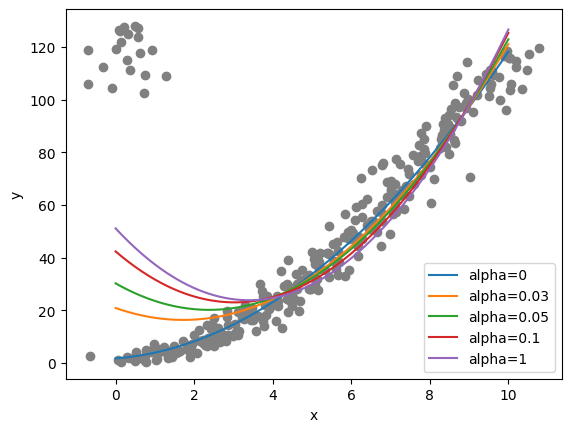

In [61]:
# Estimate the parabolas given the list of alpha(s).
alphas = [0, 0.03, 0.05, 0.1, 1]
w_history = l1_l2_grad_descent(old_X, X, Y, alpha_list=alphas)

# print and plot the result
plt.scatter(old_X, Y, color='gray')
for alpha, ws in zip(alphas, w_history):
    w0, w1, w2 = ws
    
    # plot
    X_line = np.linspace(0,10,300)
    Y_line = w0 + w1 * X_line + w2 * (X_line**2)
    plt.plot(X_line, Y_line, label='alpha={}'.format(alpha))
    
    # print
    print('When alpha = {},'.format(alpha))
    print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<!-- BEGIN QUESTION -->

## Question 4.4 Comparison


Compare the parabolas in Q5.3. Try to explain the trend from $\alpha = 0$ (i.e. $L_1$
 norm), $\alpha = 0.03$, $\alpha = 0.05$, $\alpha = 0.1$, till $\alpha = 1$ (i.e. squared $L_2$ norm).

You may type your answers directly in the Markdown cell below.


**Hint**: You may need to consider the outliers in the data points for your reasoning.

_Points:_ 3

In the graph, there is a group of outliers in the top left.

$L_2$ norm takes the square of the difference between the prediction and truth, whereas $L_1$ norm does not. This means that prediction errors with $L_2$ norm penalize big differences far more than smaller differences, whereas $L_1$ norm punishes small and big differences proportionally. 

As a result, the more the gradient is weighted towards $L_2$ norm (higher $\alpha$), the more it is affected by outliers that are significantly different from the prediction model. This causes the regression line to bend towards the outliers more and more as $L_2$ norm penalizes the model for the significant difference, whereas the regression line with $L_1$ norm (smaller $\alpha$) comfortably follows the majority cluster as it is not penalized as much for not following outliers. 

<!-- END QUESTION -->

# End of A4

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Please make sure to see the output of the gradescope autograder. You are responsible for waiting and ensuring that the autograder is executing normally for your submission. Please create a Piazza post if you see errors in autograder execution.

In [ ]:
grader.export(pdf=False, force_save=True, run_tests=True, files=['imgs', 'requirements.txt', 'parabola_estimation.npy'])

<IPython.core.display.Javascript object>